# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#having trouble install timeseries. performed pip install timeseries. it was installed, and jupyter notebook was reloaded 
#but it didn't resolve the issue.
# restarting the computer after installation solves the issue.

# /Users/AR/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: 
# FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version.
# Please use the pandas.tseries module instead.
#  from pandas.core import datetools


/Users/AR/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source, please change the source according to your computer.
df_raw = pd.read_csv("/Users/AR/Desktop/GA_work/project_2/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()
# or use len() function to get highest value, including the header

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations in first column. Rest of the columns are incomplete at 398, 398 and 399 observations.

#### Question 2. Create a summary table

In [4]:
#function

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Larger standard deviation means that data points can spread further apart from the mean value. The GRE data points have min of 220, max of 800 and mean of 588.04. These values are much further apart than GPA. In the GPA column, we got min value of 2.26, max of 4 and mean of 3.39 (closer to max value). The GPA scale of 0-4 provides closely knit value which can not affect the STD value so drastically.

#### Question 4. Drop data points with missing data


In [6]:

df_new = df_raw.dropna(axis=0, how='any')

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [7]:
#The new df_raw has 397 rows instead of 400.

df_new.count()
df_new.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

In [8]:
df_new.gre.quantile(.25)

520.0

In [9]:
df_new.gre.quantile(.50)

580.0

In [10]:
df_new.gre.quantile(.75)

660.0

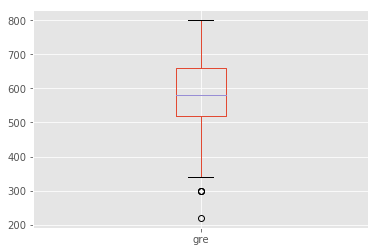

In [11]:
#boxplot 1
df_new[['gre']].plot(kind='box');

In [12]:
df_new.gpa.quantile(.25)

3.13

In [13]:
df_new.gpa.quantile(.50)

3.4

In [14]:
df_new.gpa.quantile(.75)

3.67

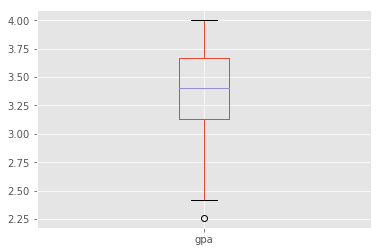

In [15]:
#boxplot 2
df_new[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: These plots represent the quartile values calculated above, along with the median.The also show the outliers. GRE plot has outliers between 200 - 300 and GPA plot has outlier at 2.25.

#### Question 8. Describe each distribution 

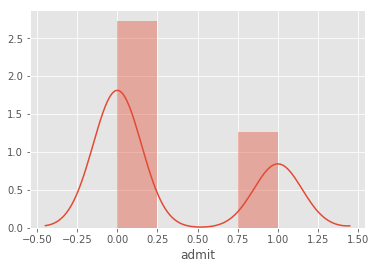

In [17]:
# plot the distribution of each variable 

sns.distplot(df_new.admit)


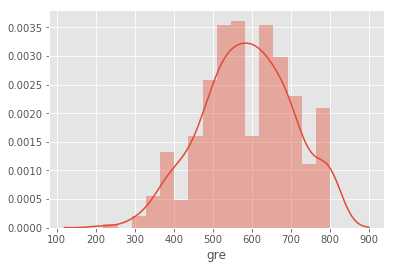

In [18]:
sns.distplot(df_new.gre)

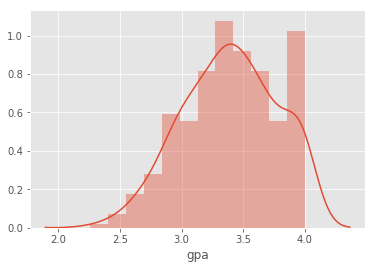

In [19]:
sns.distplot(df_new.gpa)

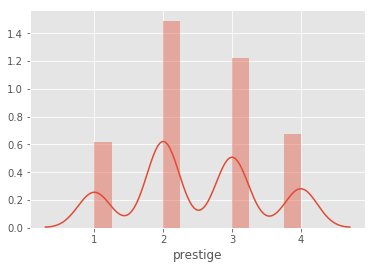

In [20]:
sns.distplot(df_new.prestige)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Normal distributions produce symmetric bell shaped curves and they are dependent upon mean and STD. First plot has bimodal distribution, and last plot does not have a conventional distribution. I don't think it can be described by parametric means, unless the data is normalized around the mean value. It has too many significant values in all 4 ranks, and closely related values in ranks 2 and 3. Plots for GRE and GPA show slight negative skewness, they are leaning towards right side.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The plots for GPA and GRE can be normalized by excluding the outliers, and taking smaller sample from the whole data. It may introduce some bias, but this risk can be evaluated by taking out smaller number fo observations each time, and see how many values are absolutely necessary to exclude, it order to normalize the distribution and plot curves. Same cannot be said for admit and prestige, those plots are created on strict values, and perhaps they are not expected to show normal distribution. Violin plot would be best for visualization in their case.

#### Question 11. Which of our variables are potentially colinear? 

In [22]:
# create a correlation matrix for the data
df_new.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


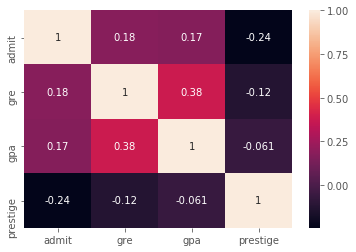

In [23]:
sns.heatmap(df_new.corr(), annot = True)

#### Question 12. What did you find?

Answer: The GRE and GPA columns have the highest positive correlation with each other at 0.38. The value of 1 is irrelevant because that is only produced when a column is measured against itself.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: It seems that after performing basic statistics on all columns, we need to:
1. Remove outliers
2. Study the distribution of columns after outliers are removed.
3. See if the GPA and GRE columns can be normalized.
4. What is the effect on 'admit' and 'prestige' after normalization attempt.
5. Admit and prestige currently have a negative correlation at -0.24, this is a weak correlation.
6. Find ways to strengthen this relationship, even if it is negative, (and we might have expected it to be positive).

#### Question 14. What is your hypothesis? 

Answer: Is there a correlation between rate of admission and prestige of undergraduate schools while applying to graduate schools? Our initial analysis shows that there is a possiblity of negligible negative correlation between the two, which could translate to, there is no correlation between rate of admission and prestige of undergraduate schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data